In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/ML_project

/content/drive/MyDrive/ML_project


In [ ]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import naive_bayes
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#데이터 불러오기
data=pd.read_csv("./high_diamond_ranked_10min.csv")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

In [ ]:
data.head()

gameId  blueWins  blueWardsPlaced  blueWardsDestroyed  blueFirstBlood  \
0  4519157822         0               28                   2               1   
1  4523371949         0               12                   1               0   
2  4521474530         0               15                   0               0   
3  4524384067         0               43                   1               0   
4  4436033771         0               75                   4               0   

   blueKills  blueDeaths  blueAssists  blueEliteMonsters  blueDragons  \
0          9           6           11                  0            0   
1          5           5            5                  0            0   
2          7          11            4                  1            1   
3          4           5            5                  1            0   
4          6           6            6                  0            0   

   blueHeralds  blueTowersDestroyed  blueTotalGold  blueAvgLevel  \
0            0                    0          17210           6.6   
1            0                    0          14712           6.6   
2            0                    0          16113           6.4   
3            1                    0          15157           7.0   
4            0                    0          16400           7.0   

   blueTotalExperience  blueTotalMinionsKilled  blueTotalJungleMinionsKilled  \
0                17039                     195                            36   
1                16265                     174                            43   
2                16221                     186                            46   
3                17954                     201                            55   
4                18543                     210                            57   

   blueGoldDiff  blueExperienceDiff  blueCSPerMin  blueGoldPerMin  \
0           643                  -8          19.5          1721.0   
1         -2908               -1173          17.4          1471.2   
2         -1172               -1033          18.6          1611.3   
3         -1321                  -7          20.1          1515.7   
4         -1004                 230          21.0          1640.0   

   redWardsPlaced  redWardsDestroyed  redFirstBlood  redKills  redDeaths  \
0              15                  6              0         6          9   
1              12                  1              1         5          5   
2              15                  3              1        11          7   
3              15                  2              1         5          4   
4              17                  2              1         6          6   

   redAssists  redEliteMonsters  redDragons  redHeralds  redTowersDestroyed  \
0           8                 0           0           0                   0   
1           2                 2           1           1                   1   
2          14                 0           0           0                   0   
3          10                 0           0           0                   0   
4           7                 1           1           0                   0   

   redTotalGold  redAvgLevel  redTotalExperience  redTotalMinionsKilled  \
0         16567          6.8               17047                    197   
1         17620          6.8               17438                    240   
2         17285          6.8               17254                    203   
3         16478          7.0               17961                    235   
4         17404          7.0               18313                    225   

   redTotalJungleMinionsKilled  redGoldDiff  redExperienceDiff  redCSPerMin  \
0                           55         -643                  8         19.7   
1                           52         2908               1173         24.0   
2                           28         1172               1033         20.3   
3                           47         1321                  7         23.5   
4   

In [ ]:
# Drop repeatedly and redundant columns (e.g. gameId, red-based); retain the blue's metrics only.
data.drop(data.columns[[0] + [17] + [20] + list(range(21, 40))], inplace=True, axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   blueWins                      9879 non-null   int64  
 1   blueWardsPlaced               9879 non-null   int64  
 2   blueWardsDestroyed            9879 non-null   int64  
 3   blueFirstBlood                9879 non-null   int64  
 4   blueKills                     9879 non-null   int64  
 5   blueDeaths                    9879 non-null   int64  
 6   blueAssists                   9879 non-null   int64  
 7   blueEliteMonsters             9879 non-null   int64  
 8   blueDragons                   9879 non-null   int64  
 9   blueHeralds                   9879 non-null   int64  
 10  blueTowersDestroyed           9879 non-null   int64  
 11  blueTotalGold                 9879 non-null   int64  
 12  blueAvgLevel                  9879 non-null   float64
 13  blu

In [ ]:
data.head()

blueWins  blueWardsPlaced  blueWardsDestroyed  blueFirstBlood  blueKills  \
0         0               28                   2               1          9   
1         0               12                   1               0          5   
2         0               15                   0               0          7   
3         0               43                   1               0          4   
4         0               75                   4               0          6   

   blueDeaths  blueAssists  blueEliteMonsters  blueDragons  blueHeralds  \
0           6           11                  0            0            0   
1           5            5                  0            0            0   
2          11            4                  1            1            0   
3           5            5                  1            0            1   
4           6            6                  0            0            0   

   blueTowersDestroyed  blueTotalGold  blueAvgLevel  blueTotalExperience  \
0                    0          17210           6.6                17039   
1                    0          14712           6.6                16265   
2                    0          16113           6.4                16221   
3                    0          15157           7.0                17954   
4                    0          16400           7.0                18543   

   blueTotalMinionsKilled  blueTotalJungleMinionsKilled  blueExperienceDiff  \
0                     195                            36                  -8   
1                     174                            43               -1173   
2                     186                            46               -1033   
3                     201                            55                  -7   
4                     210                            57                 230   

   blueCSPerMin  
0          19.5  
1          17.4  
2          18.6  
3          20.1  
4          21.0

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   blueWins                      9879 non-null   int64  
 1   blueWardsPlaced               9879 non-null   int64  
 2   blueWardsDestroyed            9879 non-null   int64  
 3   blueFirstBlood                9879 non-null   int64  
 4   blueKills                     9879 non-null   int64  
 5   blueDeaths                    9879 non-null   int64  
 6   blueAssists                   9879 non-null   int64  
 7   blueEliteMonsters             9879 non-null   int64  
 8   blueDragons                   9879 non-null   int64  
 9   blueHeralds                   9879 non-null   int64  
 10  blueTowersDestroyed           9879 non-null   int64  
 11  blueTotalGold                 9879 non-null   int64  
 12  blueAvgLevel                  9879 non-null   float64
 13  blu

In [ ]:
#내 코드
from sklearn.model_selection import train_test_split

#class를 제외하고 할당
X = data.iloc[:, 1:].values

# 'Class' 열을 y에 할당
y = data.iloc[:, 0].values

# 데이터를 훈련 세트와 테스트 세트로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=0,
                                                    stratify=y)

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

pipe_lr = make_pipeline(StandardScaler(), PCA(n_components=2),
                        LogisticRegression(random_state=1))

pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
print('테스트 정확도(Logistic):%.3f' % pipe_lr.score(X_test, y_test))


테스트 정확도(Logistic):0.704


In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 파이프라인 생성: 표준 스케일링, 주성분 분석, 서포트 벡터 머신
pipe_svm = make_pipeline(StandardScaler(), PCA(n_components=2), SVC(random_state=1))

# 파이프라인 학습
pipe_svm.fit(X_train, y_train)

# 테스트 데이터로 예측
y_pred_svm = pipe_svm.predict(X_test)

# 정확도 출력
accuracy_svm = pipe_svm.score(X_test, y_test)
print('테스트 정확도 (SVC): %.3f' % accuracy_svm)


테스트 정확도 (SVC): 0.703


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 파이프라인 생성: 표준 스케일링, 주성분 분석, 랜덤 포레스트
pipe_rf = make_pipeline(StandardScaler(), PCA(n_components=2), RandomForestClassifier(random_state=1))

# 파이프라인 학습
pipe_rf.fit(X_train, y_train)

# 테스트 데이터로 예측
y_pred_rf = pipe_rf.predict(X_test)

# 정확도 출력
accuracy_rf = pipe_rf.score(X_test, y_test)
print('테스트 정확도 (Random Forest): %.3f' % accuracy_rf)


테스트 정확도 (Random Forest): 0.660


In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1).split(X_train, y_train)

scores=[]
for k, (train, test) in enumerate(kfold):
  pipe_lr.fit(X_train[train], y_train[train])
  score = pipe_lr.score(X_train[test], y_train[test])
  scores.append(score)
  print('Fold: %2d, Classs dist.: %s,  Acc: %3f' % (k+1, np.bincount(y_train[train]), score))

Fold:  1, Classs dist.: [3118 3105],  Acc: 0.710983
Fold:  2, Classs dist.: [3117 3106],  Acc: 0.739884
Fold:  3, Classs dist.: [3117 3106],  Acc: 0.706647
Fold:  4, Classs dist.: [3117 3106],  Acc: 0.710983
Fold:  5, Classs dist.: [3117 3106],  Acc: 0.679191
Fold:  6, Classs dist.: [3118 3106],  Acc: 0.729378
Fold:  7, Classs dist.: [3118 3106],  Acc: 0.719247
Fold:  8, Classs dist.: [3118 3106],  Acc: 0.714906
Fold:  9, Classs dist.: [3118 3106],  Acc: 0.712012
Fold: 10, Classs dist.: [3118 3106],  Acc: 0.706223


In [ ]:
#Kfold 성능 높여보기

import numpy as np
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# 데이터 전처리 및 모델 구성
pipe_lr = make_pipeline(StandardScaler(), LogisticRegression(random_state=1, max_iter=1000))

# 하이퍼파라미터 그리드 설정
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Stratified k-Fold 교차 검증 설정
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

# Grid Search 수행
grid = GridSearchCV(pipe_lr, param_grid=param_grid, cv=kfold)
grid.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print("Best Parameter: ", grid.best_params_)

# 최적의 모델을 사용하여 평가 등의 작업 수행
best_model = grid.best_estimator_
best_score = best_model.score(X_test, y_test)
print("Best Model Accuracy: ", best_score)


Best Parameter:  {'logisticregression__C': 0.01}
Best Model Accuracy:  0.7253711201079622


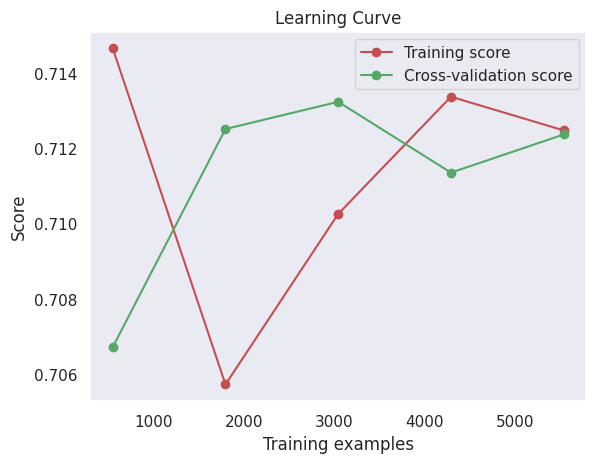

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    plt.grid()

    # 주석 처리하여 fill_between을 사용하지 않음
    # plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
    #                  train_scores_mean + train_scores_std, alpha=0.1,
    #                  color="r")
    # plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
    #                  test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# 사용할 모델 선택 (Logistic Regression으로 예시)
estimator = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2)),
    ('classifier', LogisticRegression())
])

# Learning curve를 그리기 위한 함수 호출
plot_learning_curve(estimator, "Learning Curve", X_train, y_train, cv=5)

plt.show()


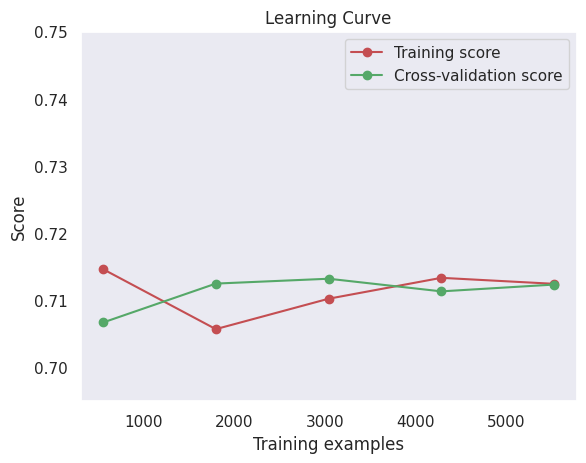

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    else:
        plt.ylim(0.695, 0.75)  # y축 범위를 0에서 1로 설정
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    plt.grid()

    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# 사용할 모델 선택 (Logistic Regression으로 예시)
estimator = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2)),
    ('classifier', LogisticRegression())
])

# Learning curve를 그리기 위한 함수 호출
plot_learning_curve(estimator, "Learning Curve", X_train, y_train, cv=5)

plt.show()


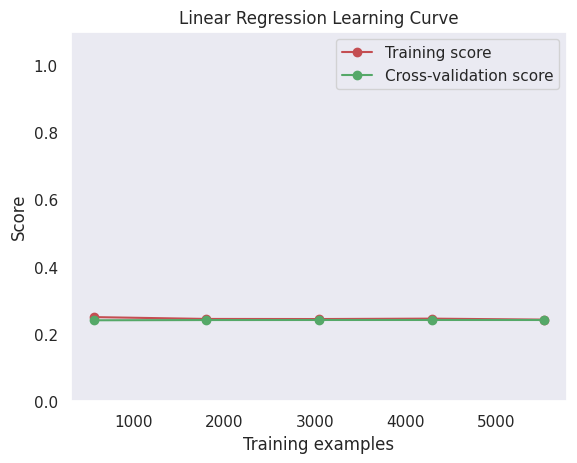

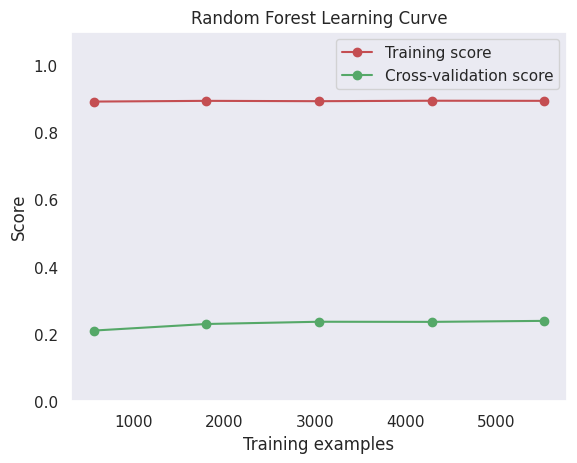

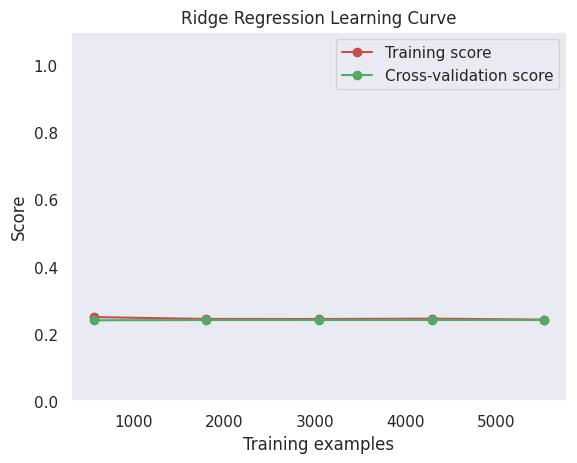

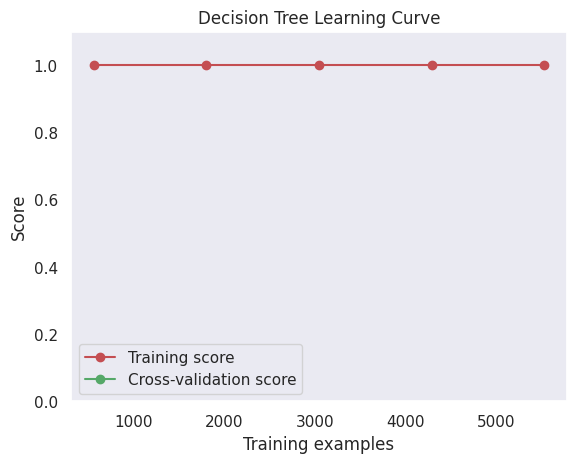

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

# 데이터가 있다고 가정 (X_train, y_train은 이미 정의되어 있어야 함)

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    else:
        plt.ylim(0.0, 1.1)  # y축 범위를 0에서 1로 설정
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    plt.grid()

    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Linear Regression
estimator_lr = make_pipeline(StandardScaler(), PCA(n_components=2), LinearRegression())
plot_learning_curve(estimator_lr, "Linear Regression Learning Curve", X_train, y_train, cv=5)
plt.show()

# RandomForestRegressor
estimator_rf = RandomForestRegressor(n_estimators=100, random_state=42)
plot_learning_curve(estimator_rf, "Random Forest Learning Curve", X_train, y_train, cv=5)
plt.show()

# Ridge Regression
estimator_ridge = make_pipeline(StandardScaler(), PCA(n_components=2), Ridge())
plot_learning_curve(estimator_ridge, "Ridge Regression Learning Curve", X_train, y_train, cv=5)
plt.show()

# Decision Tree Regressor
estimator_dt = DecisionTreeRegressor(random_state=42)
plot_learning_curve(estimator_dt, "Decision Tree Learning Curve", X_train, y_train, cv=5)
plt.show()


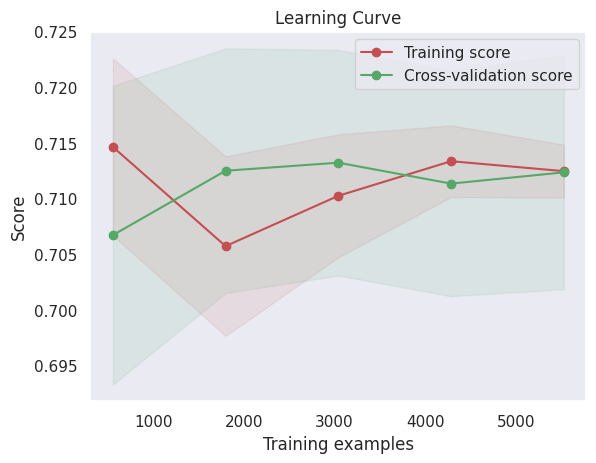

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# 사용할 모델 선택 (Logistic Regression으로 예시)
estimator = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2)),
    ('classifier', LogisticRegression())
])

# Learning curve를 그리기 위한 함수 호출
plot_learning_curve(estimator, "Learning Curve", X_train, y_train, cv=5)

plt.show()

In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(6915, 17) (6915,)
(2964, 17) (2964,)


<ipython-input-86-569e7c1b27c6>:35: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


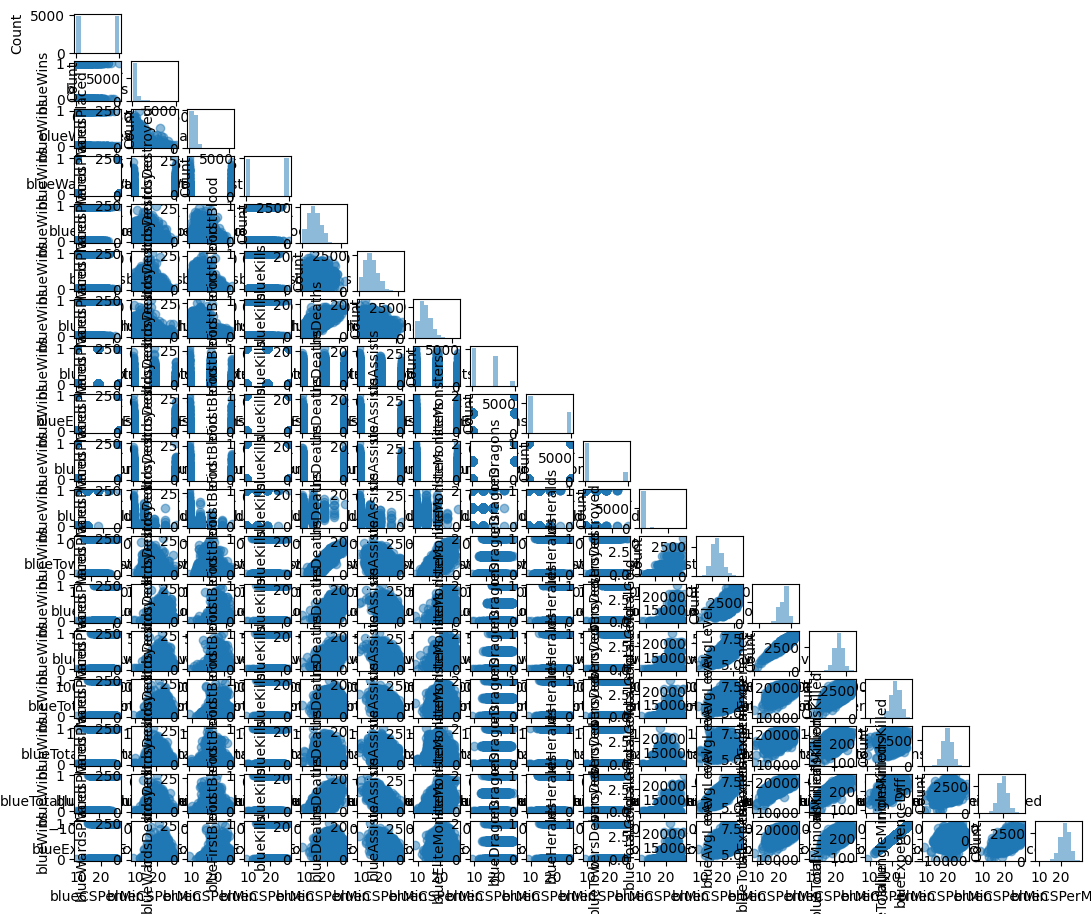

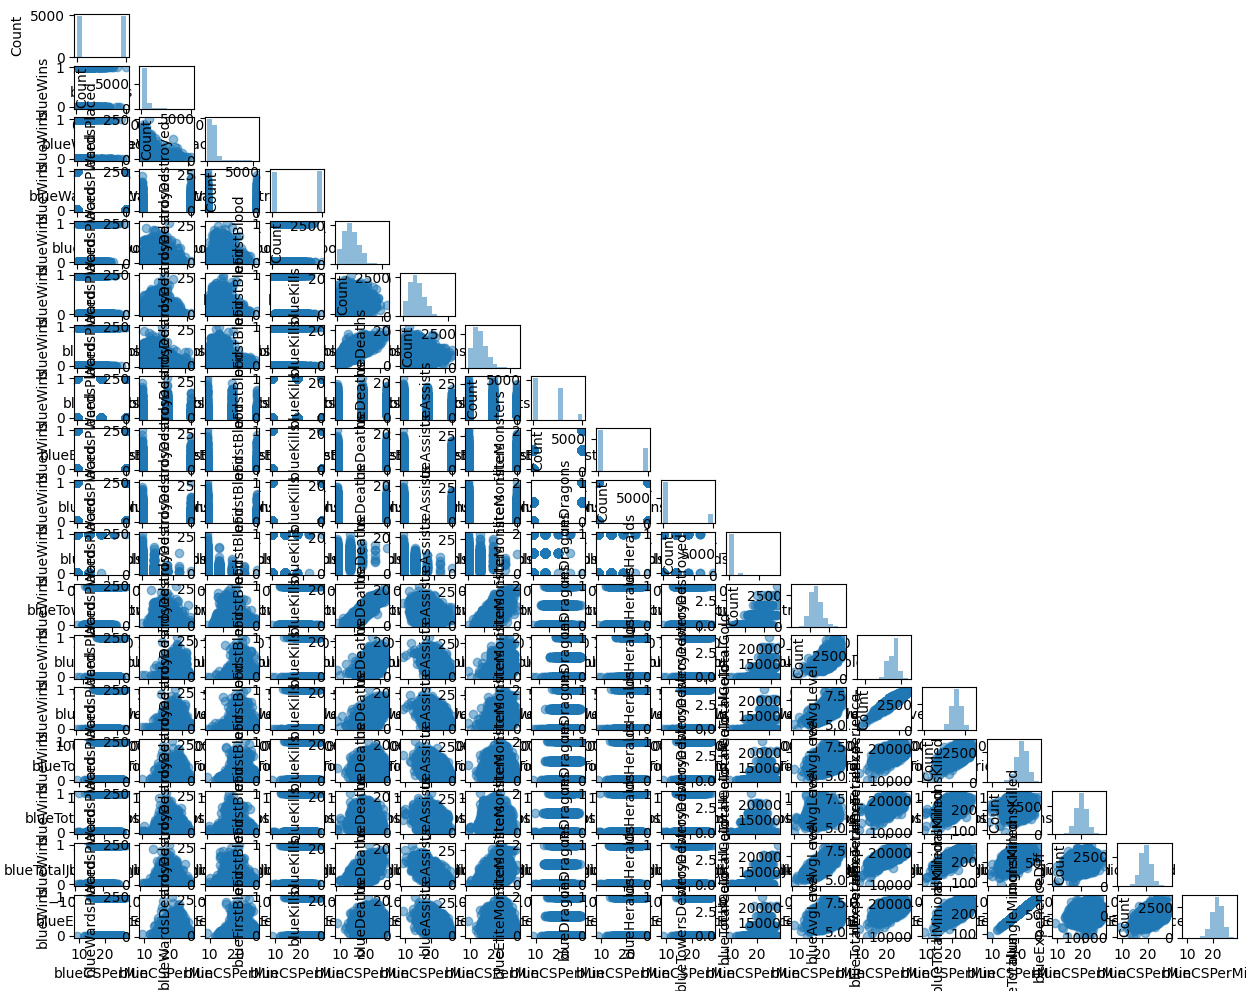

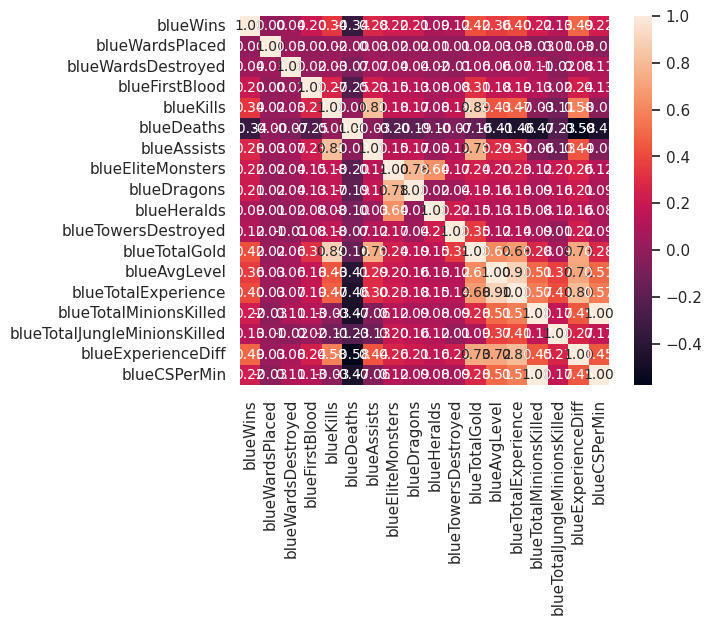

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix

# 여러분의 데이터프레임을 사용하도록 수정
cols = [
    'blueWins',
    'blueWardsPlaced',
    'blueWardsDestroyed',
    'blueFirstBlood',
    'blueKills',
    'blueDeaths',
    'blueAssists',
    'blueEliteMonsters',
    'blueDragons',
    'blueHeralds',
    'blueTowersDestroyed',
    'blueTotalGold',
    'blueAvgLevel',
    'blueTotalExperience',
    'blueTotalMinionsKilled',
    'blueTotalJungleMinionsKilled',
    'blueExperienceDiff',
    'blueCSPerMin'
]

# 여러분의 데이터프레임을 사용하도록 수정
scatterplotmatrix(data[cols].values, figsize=(13, 11),
                  names=cols, alpha=0.5)

# 산점도 매트릭스
scatterplot_matrix = scatterplotmatrix(data[cols].values, figsize=(15, 12), names=cols, alpha=0.5)
plt.tight_layout()
plt.show()

# 상관 히트맵
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols, xticklabels=cols)
plt.show()


In [ ]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 모델들을 리스트에 저장
classifiers = [
    LogisticRegression(),
    SVC(),
    KNeighborsClassifier(),
    MLPClassifier(),
    GradientBoostingClassifier(),
    RandomForestClassifier(),
    GaussianNB()
]

# 모델 이름 리스트
classifier_names = [
    'Logistic Regression',
    'Support Vector Machine',
    'K Nearest Neighbors Classifier',
    'Multi-layer Perceptron Classifier',
    'Gradient Boosting Classifier',
    'Random Forest Classifier',
    'Gaussian Naive Bayes'
]

# 결과를 담을 리스트 초기화
results = []

# 각 모델에 대해 성능 평가 수행
for clf, name in zip(classifiers, classifier_names):
    clf.fit(X_train, y_train)  # 모델 훈련
    y_pred = clf.predict(X_test)  # 테스트 데이터에 대한 예측

    # 성능 지표 계산
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # 결과를 리스트에 추가
    results.append([name, accuracy, precision, recall, f1])

# 결과를 데이터프레임으로 변환
result_df = pd.DataFrame(results, columns=['Classifier', 'Accuracy score', 'Precision score', 'Recall score', 'F1 score'])

# 결과 출력
print(result_df)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                          Classifier  Accuracy score  Precision score  \
0                Logistic Regression        0.727058         0.722739   
1             Support Vector Machine        0.714238         0.713514   
2     K Nearest Neighbors Classifier        0.674764         0.672011   
3  Multi-layer Perceptron Classifier        0.585358         0.548225   
4       Gradient Boosting Classifier        0.722672         0.718854   
5           Random Forest Classifier        0.717949         0.715338   
6               Gaussian Naive Bayes        0.703104         0.717818   

   Recall score  F1 score  
0      0.734956  0.728797  
1      0.713996  0.713755  
2      0.680189  0.676075  
3      0.960784  0.698109  
4      0.729547  0.724161  
5      0.722110  0.718708  
6      0.667343  0.691661  


In [ ]:
pip install tabulate

In [ ]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tabulate import tabulate

# 모델들을 리스트에 저장
classifiers = [
    LogisticRegression(),
    SVC(),
    KNeighborsClassifier(),
    MLPClassifier(),
    GradientBoostingClassifier(),
    RandomForestClassifier(),
    GaussianNB()
]

# 모델 이름 리스트
classifier_names = [
    'Logistic Regression',
    'Support Vector Machine',
    'K Nearest Neighbors Classifier',
    'Multi-layer Perceptron Classifier',
    'Gradient Boosting Classifier',
    'Random Forest Classifier',
    'Gaussian Naive Bayes'
]

# 결과를 담을 리스트 초기화
results = []

# 각 모델에 대해 성능 평가 수행
for clf, name in zip(classifiers, classifier_names):
    clf.fit(X_train, y_train)  # 모델 훈련
    y_pred = clf.predict(X_test)  # 테스트 데이터에 대한 예측

    # 성능 지표 계산
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # 결과를 리스트에 추가
    results.append([name, accuracy, precision, recall, f1])

# 결과를 데이터프레임으로 변환
result_df = pd.DataFrame(results, columns=['Classifier', 'Accuracy score', 'Precision score', 'Recall score', 'F1 score'])

# 결과를 표로 출력
table = tabulate(result_df, headers='keys', tablefmt='pretty', showindex=False)
print(table)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


+-----------------------------------+--------------------+--------------------+--------------------+--------------------+
|            Classifier             |   Accuracy score   |  Precision score   |    Recall score    |      F1 score      |
+-----------------------------------+--------------------+--------------------+--------------------+--------------------+
|        Logistic Regression        | 0.7270580296896086 | 0.7227393617021277 | 0.7349560513860717 | 0.728796513576936  |
|      Support Vector Machine       | 0.7142375168690959 | 0.7135135135135136 | 0.7139959432048681 | 0.7137546468401487 |
|  K Nearest Neighbors Classifier   | 0.6747638326585695 | 0.6720106880427522 | 0.6801893171061528 | 0.6760752688172043 |
| Multi-layer Perceptron Classifier | 0.6663292847503374 | 0.6115664845173042 | 0.9080459770114943 | 0.7308843537414966 |
|   Gradient Boosting Classifier    | 0.7230094466936572 | 0.7193333333333334 | 0.7295469912102772 | 0.7244041624706278 |
|     Random Forest Clas

In [ ]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 모델들을 리스트에 저장
classifiers = [
    LogisticRegression(),
    SVC(),
    KNeighborsClassifier(),
    MLPClassifier(),
    GradientBoostingClassifier(),
    RandomForestClassifier(),
    GaussianNB()
]

# 모델 이름 리스트
classifier_names = [
    'Logistic Regression',
    'Support Vector Machine',
    'K Nearest Neighbors Classifier',
    'Multi-layer Perceptron Classifier',
    'Gradient Boosting Classifier',
    'Random Forest Classifier',
    'Gaussian Naive Bayes'
]

# 결과를 담을 리스트 초기화
results = []

# 각 모델에 대해 성능 평가 수행
for clf, name in zip(classifiers, classifier_names):
    clf.fit(X_train, y_train)  # 모델 훈련
    y_pred = clf.predict(X_test)  # 테스트 데이터에 대한 예측

    # 성능 지표 계산
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # 결과를 리스트에 추가
    results.append([name, accuracy, precision, recall, f1])

# 결과를 데이터프레임으로 변환
result_df = pd.DataFrame(results, columns=['Classifier', 'Accuracy score', 'Precision score', 'Recall score', 'F1 score'])

# 결과 출력
print(result_df)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                          Classifier  Accuracy score  Precision score  \
0                Logistic Regression        0.727058         0.722739   
1             Support Vector Machine        0.714238         0.713514   
2     K Nearest Neighbors Classifier        0.674764         0.672011   
3  Multi-layer Perceptron Classifier        0.570850         0.948052   
4       Gradient Boosting Classifier        0.721997         0.718479   
5           Random Forest Classifier        0.715587         0.711718   
6               Gaussian Naive Bayes        0.703104         0.717818   

   Recall score  F1 score  
0      0.734956  0.728797  
1      0.713996  0.713755  
2      0.680189  0.676075  
3      0.148073  0.256140  
4      0.728195  0.723304  
5      0.722786  0.717209  
6      0.667343  0.691661  


In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# 사용할 모델 선택 (Logistic Regression으로 예시)
estimator = make_pipeline(StandardScaler(), PCA(n_components=2), LogisticRegression())

# Learning curve를 그리기 위한 함수 호출
plot_learning_curve(estimator, "Learning Curve", X_train, y_train,


SyntaxError: ignored

In [ ]:
import numpy as np
from mlxtend.plotting import heatmap

# 여러분의 데이터프레임을 사용하도록 수정
cm = np.corrcoef(data[cols].values.T)
hm = heatmap(cm, row_names=cols, column_names=cols, figsize=(20, 18))

# plt.savefig('images/10_04.png', dpi=300)
plt.show()


NameError: ignored

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# 모델들을 리스트에 저장
classifiers = [LR, SVC, KNN, MLPC, GBC, RFC, NB]
classifier_names = ['Logistic Regression', 'Support Vector Machine', 'K Nearest Neighbors Classifier',
                    'Multi-layer Perceptron Classifier', 'Gradient Boosting Classifier',
                    'Random Forest Classifier', 'Gaussian Naive Baiyes']

# 결과를 저장할 리스트 초기화
results = []

for clf, name in zip(classifiers, classifier_names):
    clf.fit(X_train, y_train)  # 모델 훈련
    y_pred = clf.predict(X_test)  # 테스트 데이터에 대한 예측

    # 성능 지표 계산
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # 결과를 리스트에 추가
    results.append([name, accuracy, precision, recall, f1])

# 결과를 데이터프레임으로 변환
columns = ['Classifier', 'Accuracy Score', 'Precision Score', 'Recall Score', 'F1 Score']
results_df = pd.DataFrame(results, columns=columns)

# 결과 출력
print(results_df)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


TypeError: ignored

In [ ]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # 마커와 컬러맵을 설정합니다.
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 결정 경계를 그립니다.
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

    # 테스트 샘플을 부각하여 그립니다.
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    facecolors='none',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100,
                    label='test set')

In [ ]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # 마커와 컬러맵을 설정합니다.
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 결정 경계를 그립니다.
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

    # 테스트 샘플을 부각하여 그립니다.
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    facecolors='none',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100,
                    label='test set')

In [ ]:
from sklearn.linear_model import Perceptron
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 예시: Perceptron
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
y_train_pred = perceptron.predict(X_train)
y_test_pred = perceptron.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Perceptron - Training Accuracy: {train_accuracy:.2f}, Test Accuracy: {test_accuracy:.2f}')


Perceptron - Training Accuracy: 0.60, Test Accuracy: 0.60


In [ ]:
# 다른 모델들에 대해 반복 (예시: RandomForestClassifier)
forest = RandomForestClassifier()
forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Random Forest - Training Accuracy: {train_accuracy:.2f}, Test Accuracy: {test_accuracy:.2f}')


Random Forest - Training Accuracy: 1.00, Test Accuracy: 0.71


In [ ]:
# 결과를 비교
results = {
    'Perceptron': [train_accuracy_perceptron, test_accuracy_perceptron],
    'Random Forest': [train_accuracy_forest, test_accuracy_forest],
    # 나머지 모델들도 추가
}

# 결과 출력
print("Model\t\tTraining Accuracy\t\tTest Accuracy")
for model, acc in results.items():
    print(f"{model}\t\t{acc[0]:.2f}\t\t\t\t{acc[1]:.2f}")


NameError: ignored

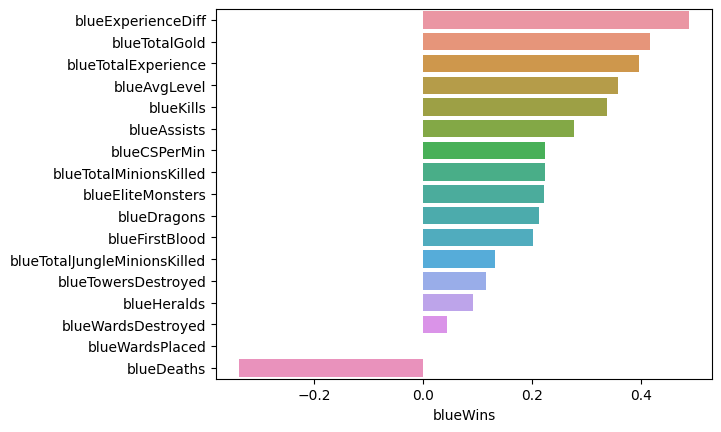

In [ ]:
# Correlation of blue team's metrics with blueWins
# Dropping negative values (e.g. blueDeaths)

corr = data.corr()["blueWins"].drop(['blueWins'])
corr = corr.sort_values(ascending=False)
sns.barplot(x=corr, y=corr.index)
plt.show()

17
(6915, 17)
 1) blueExperienceDiff             0.190701
 2) blueTotalGold                  0.134718
 3) blueTotalExperience            0.112619
 4) blueDeaths                     0.071417
 5) blueTotalJungleMinionsKilled   0.064902
 6) blueTotalMinionsKilled         0.063752
 7) blueCSPerMin                   0.062689
 8) blueWardsPlaced                0.060808
 9) blueAssists                    0.051846
10) blueKills                      0.049081
11) blueWardsDestroyed             0.041051
12) blueAvgLevel                   0.040550
13) blueEliteMonsters              0.016040
14) blueFirstBlood                 0.014948
15) blueDragons                    0.014388
16) blueHeralds                    0.007759
17) blueTowersDestroyed            0.002730


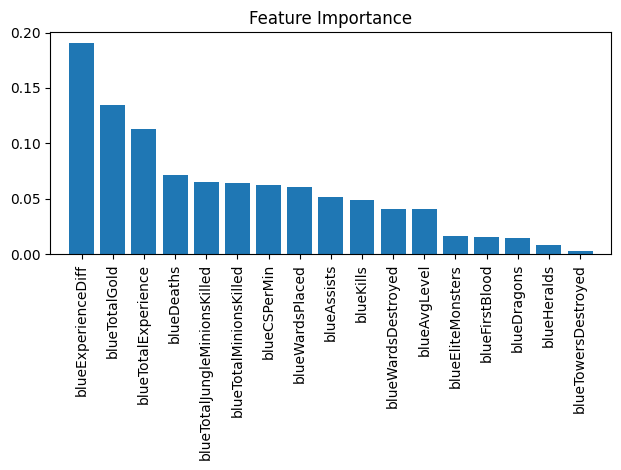

In [ ]:
#특징 중요도 검출
#Assessing feature importance with random forests

from sklearn.ensemble import RandomForestClassifier

feat_labels = data.columns[0:]
feat_labels = feat_labels.drop('blueWins')
print(len(feat_labels))


forest = RandomForestClassifier(n_estimators=500, random_state=1)

print((X_train.shape))
forest.fit(X_train, y_train)
importances=forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
  print("%2d) %-*s %f"% (f +1, 30,
                         feat_labels[indices[f]],
                         importances[indices[f]]))

plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]),
        importances[indices],
        align='center')

plt.xticks(range(X_train.shape[1]), feat_labels[indices], rotation=90)
plt.xlim([-1,X_train.shape[1]])
plt.tight_layout()
plt.show()



In [ ]:
#데이터 불러오기
data2=pd.read_csv("./high_diamond_ranked_10min.csv")

# Drop repeatedly and redundant columns (e.g. gameId, red-based); retain the blue's metrics only.
data2.drop(data2.columns[[0] + [12] + [20] + list(range(21, 40))], inplace=True, axis=1)
data2.info()

#내 코드
from sklearn.model_selection import train_test_split

#class를 제외하고 할당
X2 = data.iloc[:, 1:].values

# 'Class' 열을 y에 할당
y2 = data.iloc[:, 0].values

# 데이터를 훈련 세트와 테스트 세트로 나누기
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3,
                                                    random_state=0,
                                                    stratify=y)
print(X2_train.shape, y2_train.shape)
print(X2_test.shape, y2_test.shape)

NameError: ignored

17
(6915, 17)
 1) blueExperienceDiff             0.190701
 2) blueAvgLevel                   0.134718
 3) blueTotalMinionsKilled         0.112619
 4) blueDeaths                     0.071417
 5) blueGoldDiff                   0.064902
 6) blueTotalJungleMinionsKilled   0.063752
 7) blueCSPerMin                   0.062689
 8) blueWardsPlaced                0.060808
 9) blueAssists                    0.051846
10) blueKills                      0.049081
11) blueWardsDestroyed             0.041051
12) blueTotalExperience            0.040550
13) blueEliteMonsters              0.016040
14) blueFirstBlood                 0.014948
15) blueDragons                    0.014388
16) blueHeralds                    0.007759
17) blueTowersDestroyed            0.002730


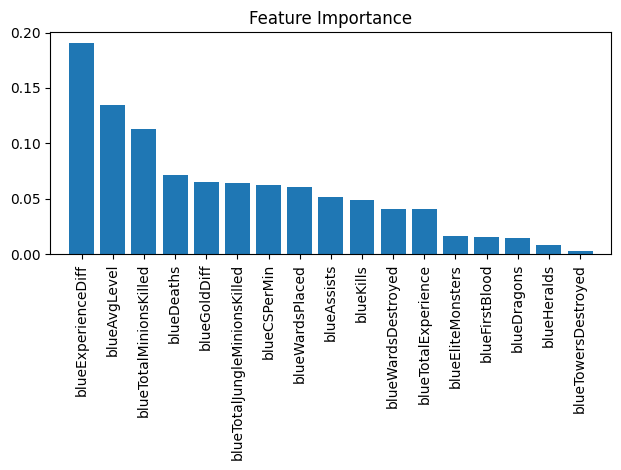

In [ ]:
#특징 중요도 검출
#Assessing feature importance with random forests

from sklearn.ensemble import RandomForestClassifier

feat_labels = data2.columns[0:]
feat_labels = feat_labels.drop('blueWins')
print(len(feat_labels))


forest = RandomForestClassifier(n_estimators=500, random_state=1)

print((X2_train.shape))
forest.fit(X2_train, y2_train)
importances=forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X2_train.shape[1]):
  print("%2d) %-*s %f"% (f +1, 30,
                         feat_labels[indices[f]],
                         importances[indices[f]]))

plt.title('Feature Importance')
plt.bar(range(X2_train.shape[1]),
        importances[indices],
        align='center')

plt.xticks(range(X2_train.shape[1]), feat_labels[indices], rotation=90)
plt.xlim([-1,X2_train.shape[1]])
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import naive_bayes
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

In [ ]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # 마커와 컬러맵을 설정합니다.
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 결정 경계를 그립니다.
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

    # 테스트 샘플을 부각하여 그립니다.
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    facecolors='none',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100,
                    label='test set')

In [ ]:
class AdalineGD:

    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.losses_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors) / X.shape[0]
            self.w_[0] += self.eta * errors.sum() / X.shape[0]
            loss = (errors**2).sum() / 2.0
            self.losses_.append(loss)

        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        return X

    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0, 1, 0)


In [ ]:
from matplotlib.colors import ListedColormap

ada_gd = AdalineGD(n_iter=20, eta=0.5)
ada_gd.fit(X_train[:, [10, 12]], y_train)

plot_decision_regions(X_train[:, [10, 12]], y_train, classifier=ada_gd)
plt.title('Adaline - Gradient descent')
plt.xlabel('11th Feature [standardized]')
plt.ylabel('13th Feature [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# 오차 그래프 시각화
plt.plot(range(1, len(ada_gd.losses_) + 1), ada_gd.losses_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Mean squared error')
plt.tight_layout()
plt.show()

<ipython-input-81-b5e15afa2a5b>:19: RuntimeWarning: overflow encountered in square
  loss = (errors**2).sum() / 2.0


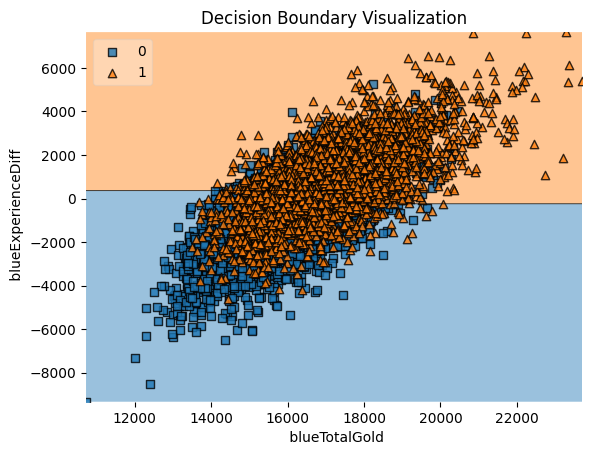

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from mlxtend.plotting import plot_decision_regions

# DecisionTreeClassifier를 사용하여 모델 훈련
tree = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)
tree.fit(X_train[:, [10, 15]], y_train)  # 첫 번째와 두 번째 특성만 사용

# 결정 경계 시각화
plot_decision_regions(X_train[:, [10, 15]], y_train, clf=tree, legend=2)

plt.xlabel(' blueTotalGold')
plt.ylabel(' blueExperienceDiff')
plt.title('Decision Boundary Visualization')
plt.show()


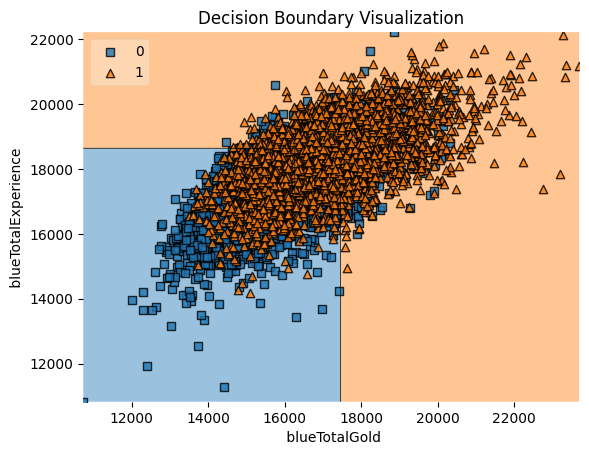

In [ ]:
from sklearn.tree import DecisionTreeClassifier
#from mlxtend.plotting import plot_decision_regions

# DecisionTreeClassifier를 사용하여 모델 훈련
tree = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)
tree.fit(X_train[:, [10, 12]], y_train)  # 첫 번째와 두 번째 특성만 사용

# 결정 경계 시각화
plot_decision_regions(X_train[:, [10, 12]], y_train, clf=tree, legend=2)

plt.xlabel(' blueTotalGold')
plt.ylabel(' blueTotalExperience ')
plt.title('Decision Boundary Visualization')
plt.show()


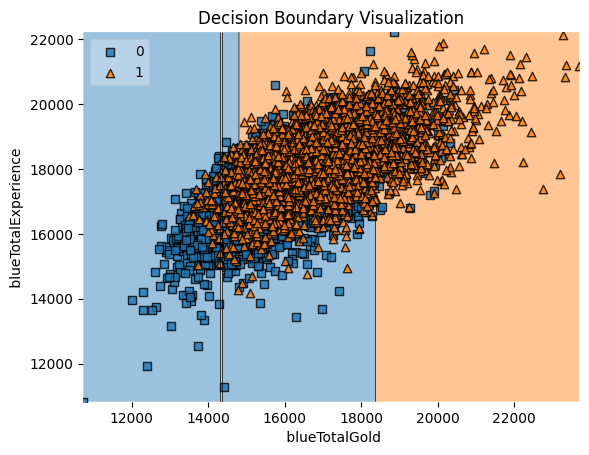

In [ ]:
from sklearn.tree import DecisionTreeClassifier
#from mlxtend.plotting import plot_decision_regions

# DecisionTreeClassifier를 사용하여 모델 훈련
tree = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)
tree.fit(X_test[:, [10, 12]], y_test)  # 첫 번째와 두 번째 특성만 사용

# 결정 경계 시각화
plot_decision_regions(X_train[:, [10, 12]], y_train, clf=tree, legend=2)

plt.xlabel(' blueTotalGold')
plt.ylabel(' blueTotalExperience ')
plt.title('Decision Boundary Visualization')
plt.show()


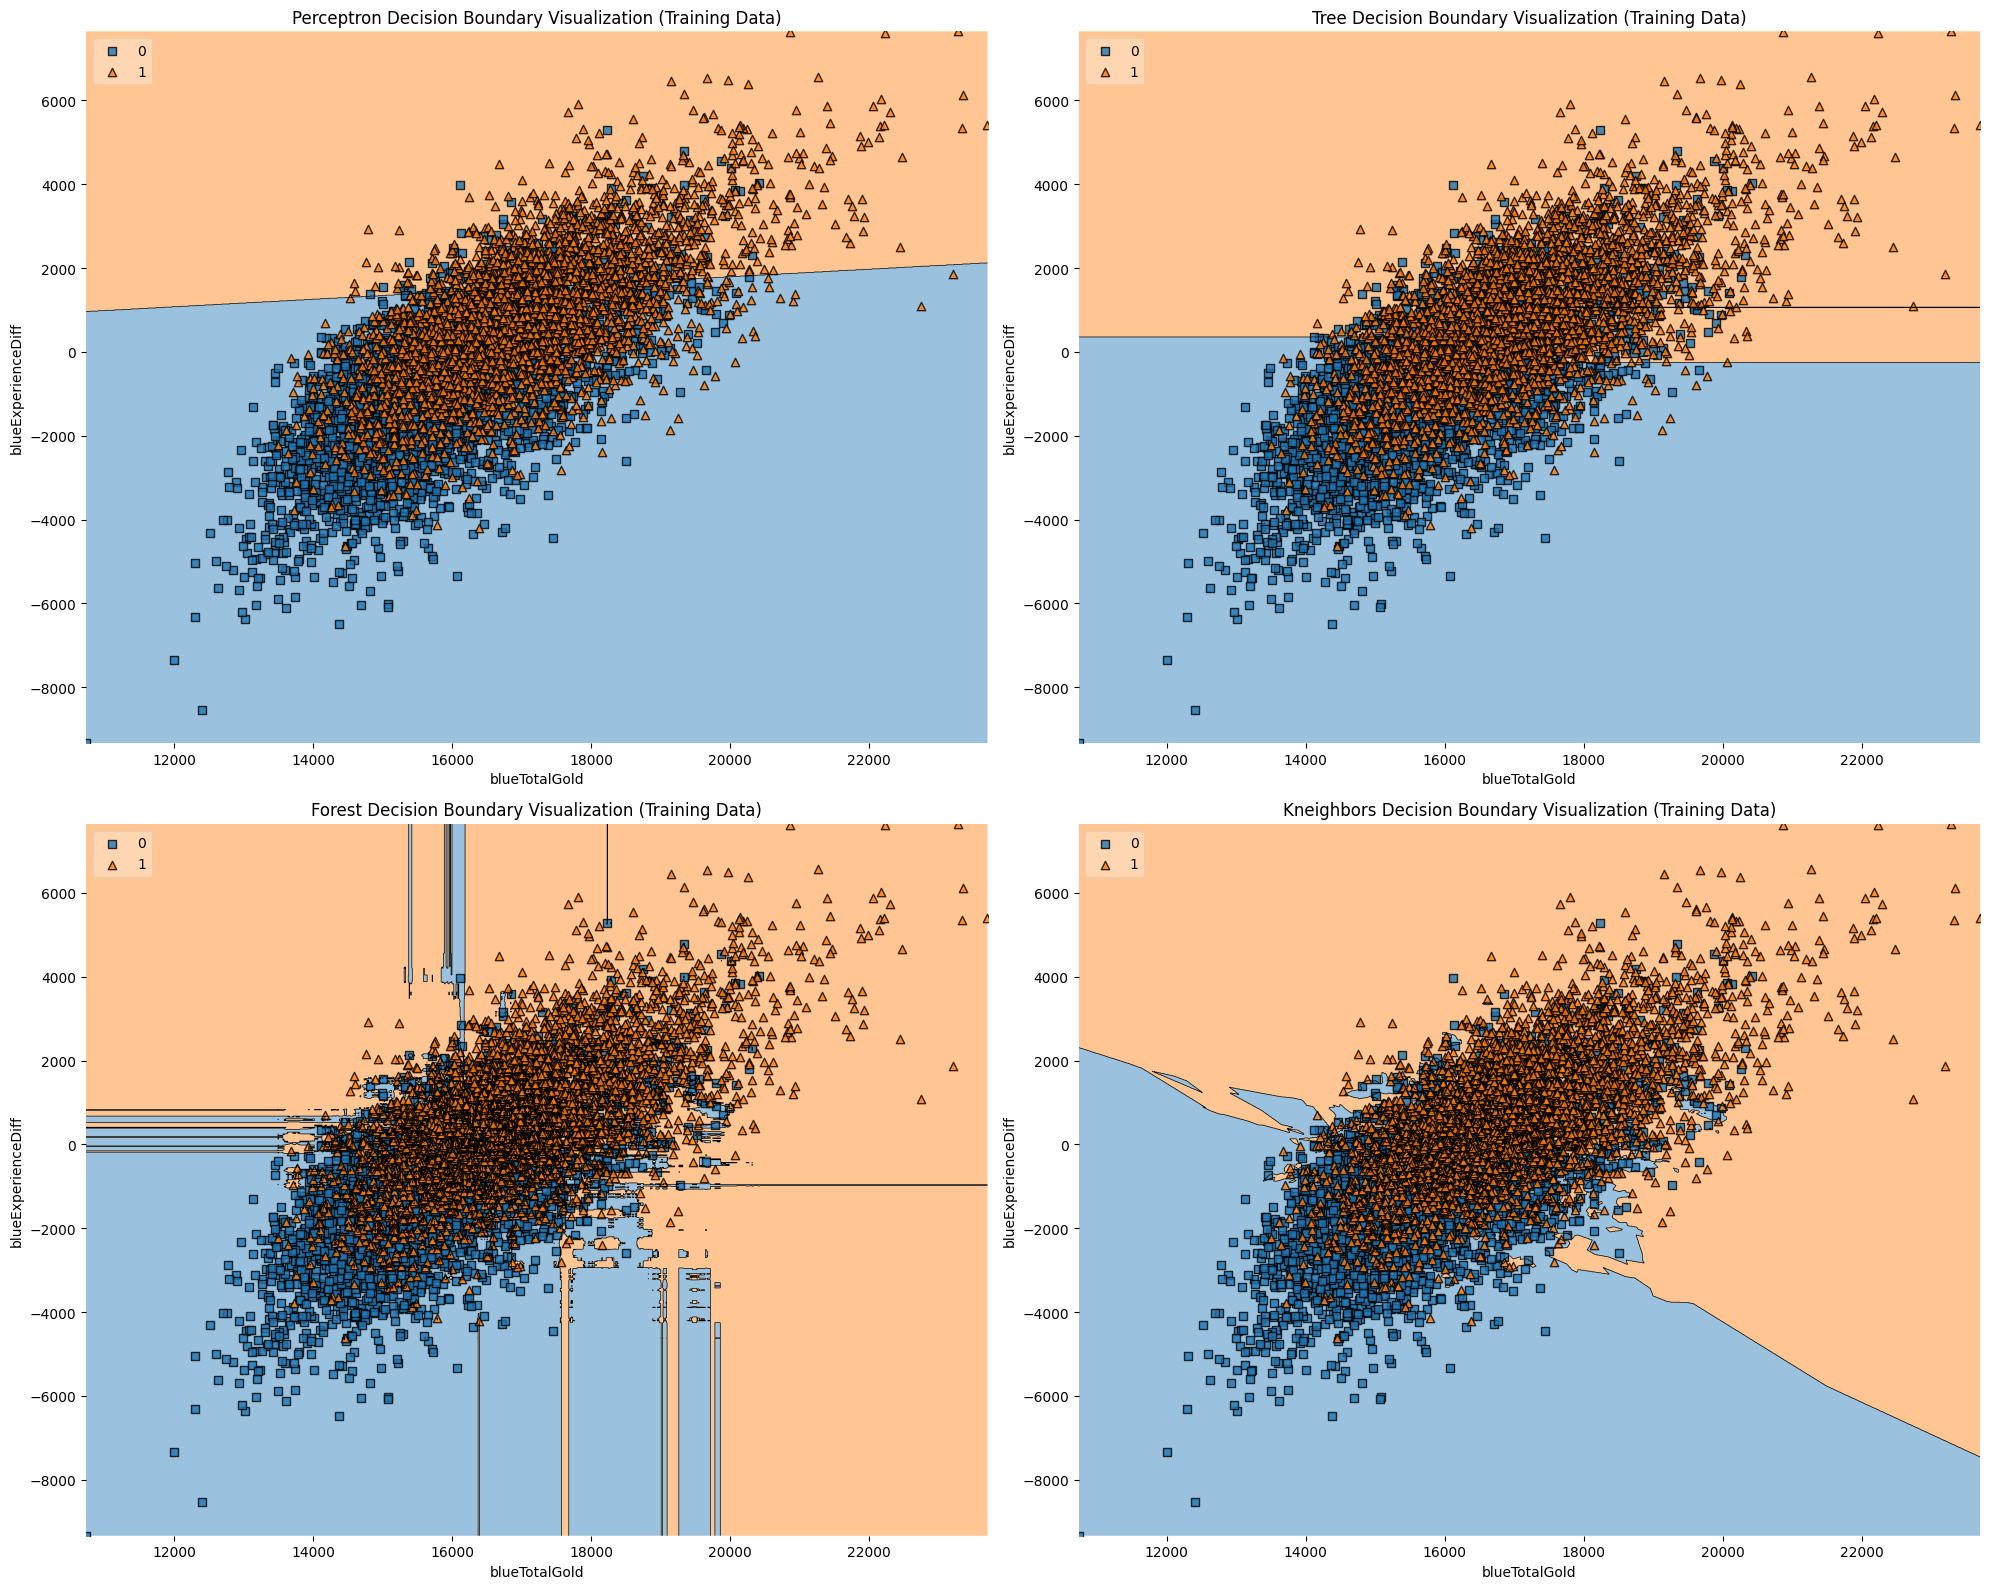

In [ ]:
from sklearn.linear_model import Perceptron
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

# Perceptron
perceptron = Perceptron()
perceptron.fit(X_train[:, [10, 15]], y_train)

# DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)
tree.fit(X_train[:, [10, 15]], y_train)

# RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(X_train[:, [10, 15]], y_train)

# KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train[:, [10, 15]], y_train)

models = [perceptron, tree, forest, knn]
model_names = ['Perceptron', 'Tree', 'Forest', 'Kneighbors']

plt.figure(figsize=(20, 16))

for i, model in enumerate(models):
    plt.subplot(2, 2, i+1)
    plot_decision_regions(X_train[:, [10, 15]], y_train, clf=model, legend=2)
    plt.xlabel('blueTotalGold')
    plt.ylabel('blueExperienceDiff')
    plt.title(f'{model_names[i]} Decision Boundary Visualization (Training Data)')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score

# Perceptron 모델의 정확도 출력
perceptron_pred_train = perceptron.predict(X_train[:, [10, 15]])
perceptron_accuracy = accuracy_score(y_train, perceptron_pred_train)
print(f'Perceptron Accuracy (Training Data): {perceptron_accuracy:.2f}')

# Decision Tree 모델의 정확도 출력
tree_pred_train = tree.predict(X_train[:, [10, 15]])
tree_accuracy = accuracy_score(y_train, tree_pred_train)
print(f'Decision Tree Accuracy (Training Data): {tree_accuracy:.2f}')

# Random Forest 모델의 정확도 출력
forest_pred_train = forest.predict(X_train[:, [10, 15]])
forest_accuracy = accuracy_score(y_train, forest_pred_train)
print(f'Random Forest Accuracy (Training Data): {forest_accuracy:.2f}')

# K-Nearest Neighbors 모델의 정확도 출력
knn_pred_train = knn.predict(X_train[:, [10, 15]])
knn_accuracy = accuracy_score(y_train, knn_pred_train)
print(f'K-Nearest Neighbors Accuracy (Training Data): {knn_accuracy:.2f}')


Perceptron Accuracy (Training Data): 0.64
Decision Tree Accuracy (Training Data): 0.72
Random Forest Accuracy (Training Data): 1.00
K-Nearest Neighbors Accuracy (Training Data): 0.78


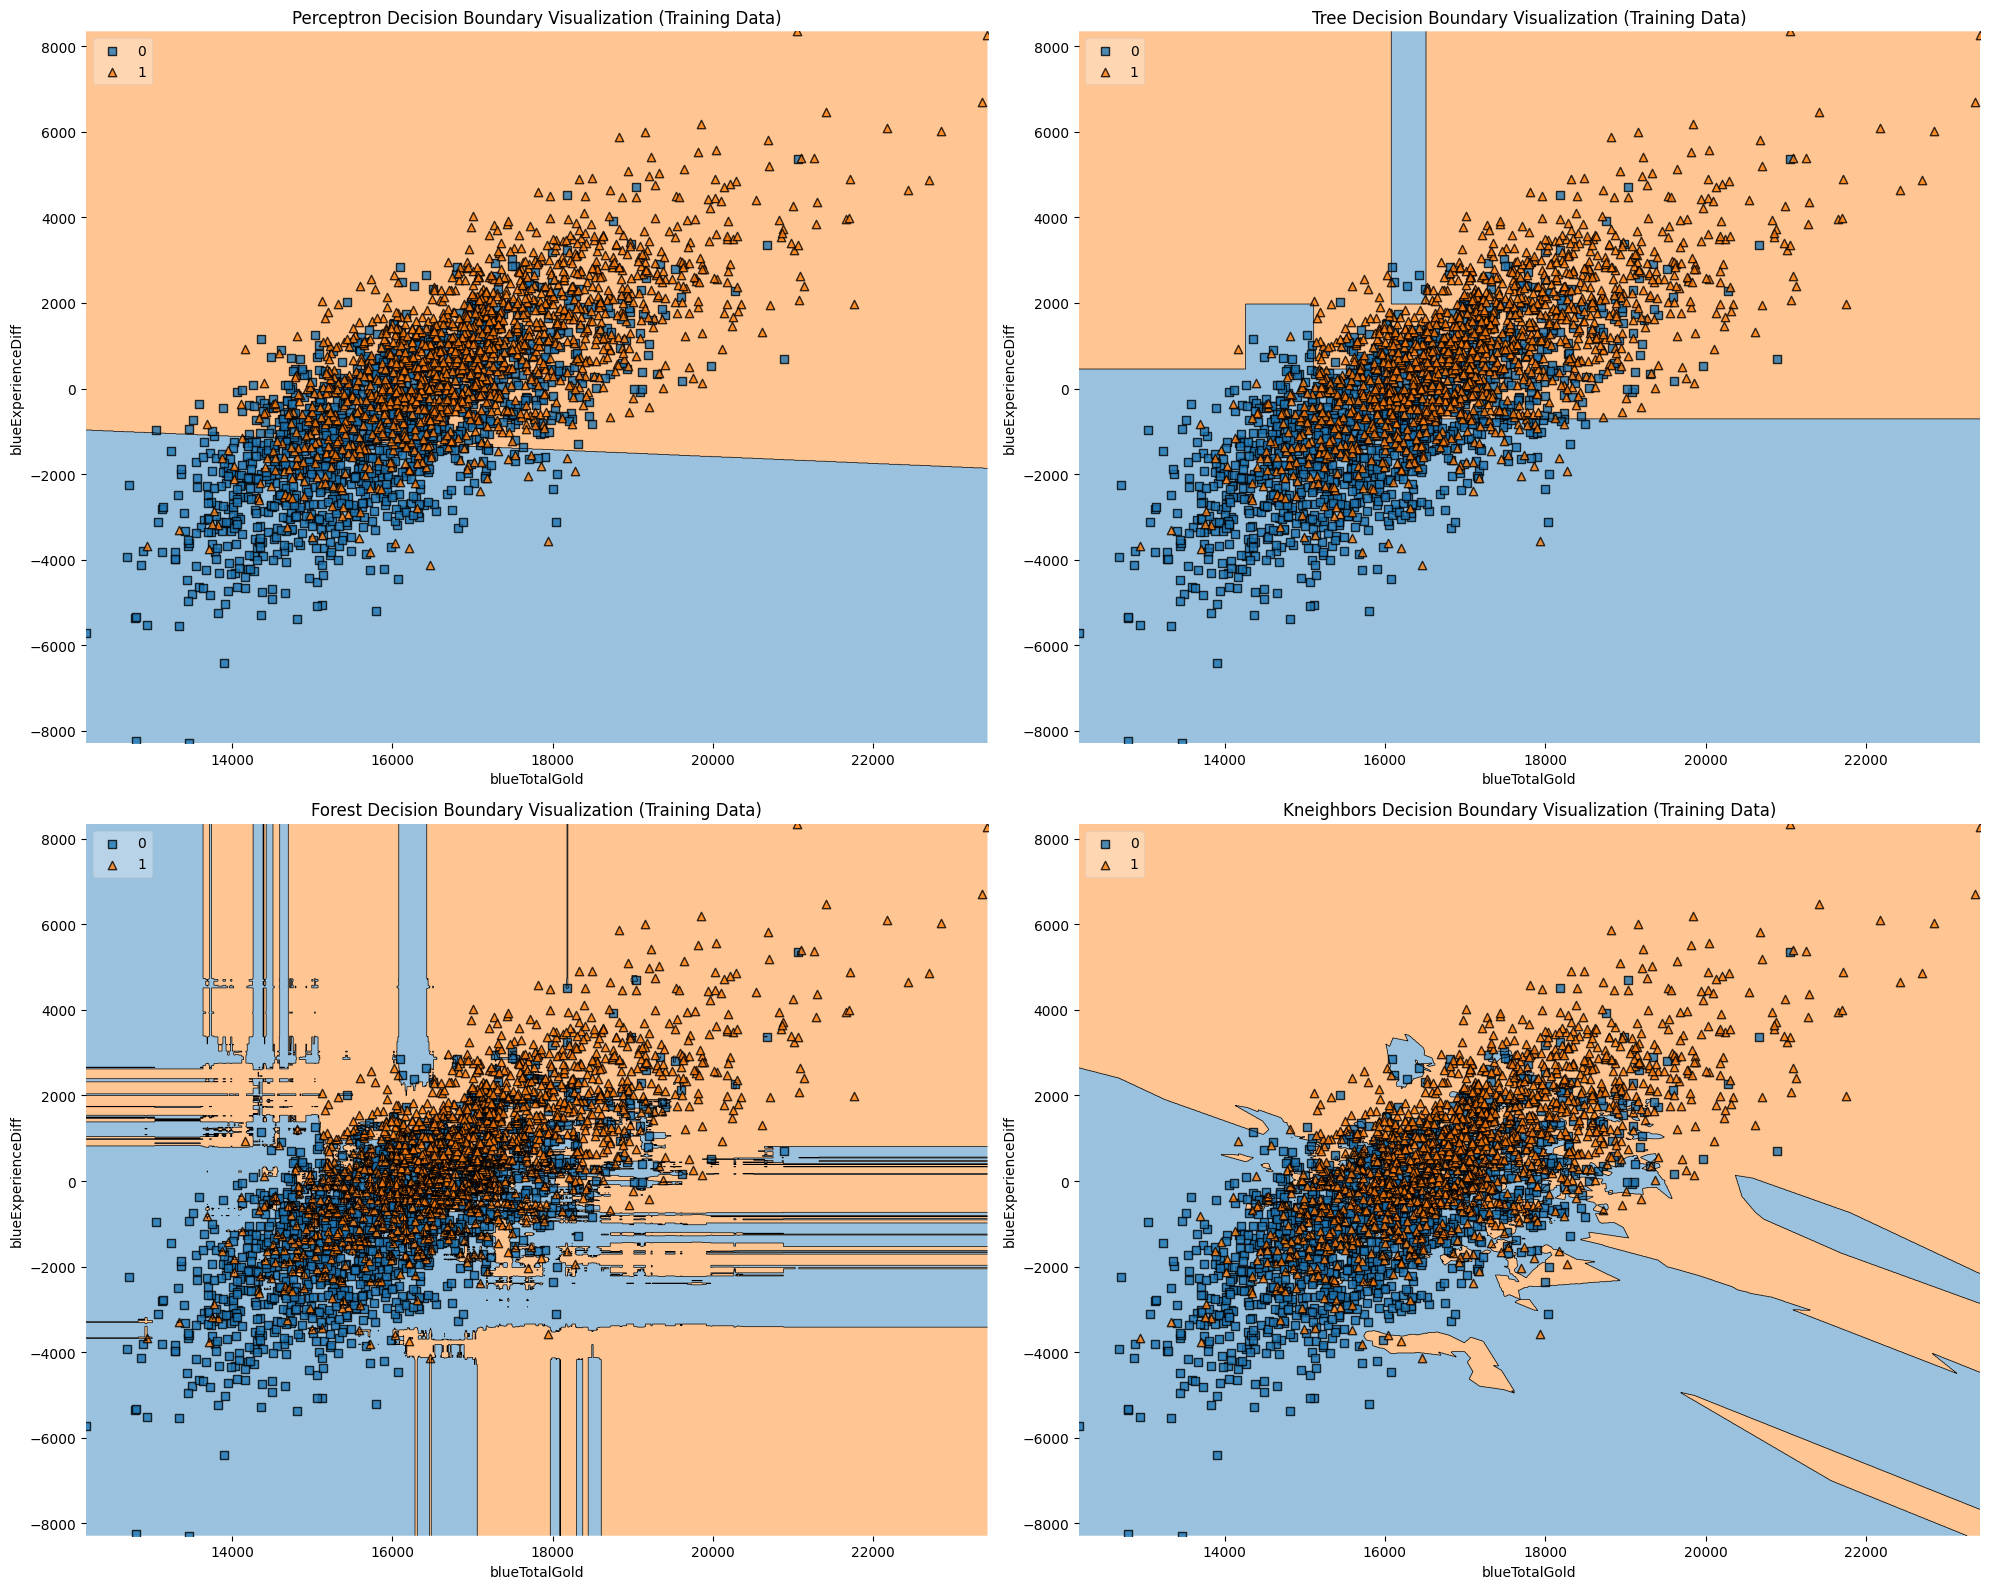

In [ ]:
from sklearn.linear_model import Perceptron
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

# Perceptron 모델 훈련
perceptron = Perceptron()
perceptron.fit(X_test[:, [10, 15]], y_test)

# DecisionTreeClassifier를 사용하여 모델 훈련
tree = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)
tree.fit(X_test[:, [10, 15]], y_test)

# RandomForestClassifier 모델 훈련
forest = RandomForestClassifier()
forest.fit(X_test[:, [10, 15]], y_test)

# KNeighborsClassifier 모델 훈련
knn = KNeighborsClassifier()
knn.fit(X_test[:, [10, 15]], y_test)

# 모델들의 결정 경계 시각화
models = [perceptron, tree, forest, knn]
model_names = ['Perceptron', 'Tree', 'Forest', 'Kneighbors']

plt.figure(figsize=(20, 16))

for i, model in enumerate(models):
    plt.subplot(2, 2, i+1)
    plot_decision_regions(X_test[:, [10, 15]], y_test, clf=model, legend=2)
    plt.xlabel('blueTotalGold')
    plt.ylabel('blueExperienceDiff')
    plt.title(f'{model_names[i]} Decision Boundary Visualization (Training Data)')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score

# Perceptron 모델의 정확도 출력
perceptron_pred = perceptron.predict(X_test[:, [10, 15]])
perceptron_accuracy = accuracy_score(y_test, perceptron_pred)
print(f'Perceptron Accuracy: {perceptron_accuracy:.2f}')

# DecisionTreeClassifier 모델의 정확도 출력
tree_pred = tree.predict(X_test[:, [10, 15]])
tree_accuracy = accuracy_score(y_test, tree_pred)
print(f'Tree Accuracy: {tree_accuracy:.2f}')

# RandomForestClassifier 모델의 정확도 출력
forest_pred = forest.predict(X_test[:, [10, 15]])
forest_accuracy = accuracy_score(y_test, forest_pred)
print(f'Forest Accuracy: {forest_accuracy:.2f}')

# KNeighborsClassifier 모델의 정확도 출력
knn_pred = knn.predict(X_test[:, [10, 15]])
knn_accuracy = accuracy_score(y_test, knn_pred)
print(f'Kneighbors Accuracy: {knn_accuracy:.2f}')


Perceptron Accuracy: 0.66
Tree Accuracy: 0.72
Forest Accuracy: 1.00
Kneighbors Accuracy: 0.77


In [ ]:
from sklearn.linear_model import Perceptron
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

# Perceptron 모델 훈련
perceptron = Perceptron()
perceptron.fit(X_train[:, [10, 15]], y_train)

# DecisionTreeClassifier를 사용하여 모델 훈련
tree = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)
tree.fit(X_train[:, [10, 15]], y_train)

# RandomForestClassifier 모델 훈련
forest = RandomForestClassifier()
forest.fit(X_train[:, [10, 15]], y_train)

# KNeighborsClassifier 모델 훈련
knn = KNeighborsClassifier()
knn.fit(X_train[:, [10, 15]], y_train)

# 모델들의 결정 경계 시각화
models = [perceptron, tree, forest, knn]
model_names = ['Perceptron', 'Tree', 'Forest', 'Kneighbors']

plt.figure(figsize=(20, 16))

for i, model in enumerate(models):
    plt.subplot(2, 2, i+1)
    plot_decision_regions(X_train[:, [10, 15]], y_train, clf=model, legend=2)
    plt.xlabel('blueTotalGold')
    plt.ylabel('blueExperienceDiff')
    plt.title(f'{model_names[i]} Decision Boundary Visualization (Training Data)')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
# 원하는 트리 수로 설정
n_estimators = 10000
max_depth = 100
forest = RandomForestClassifier(n_estimators=n_estimators,max_depth=max_depth,  random_state=0)

#모델 훈련
forest.fit(X_test[:, [10, 15]], y_test)

# 교차 검증 수행
cv_scores = cross_val_score(forest, X_test[:, [10, 15]], y_test, cv=5)

# 교차 검증 정확도 출력
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))


Cross-Validation Scores: [0.65767285 0.67790894 0.68971332 0.65092749 0.71959459]
Mean Accuracy: 0.6791634383118363


In [ ]:
data.head()

blueWins  blueWardsPlaced  blueWardsDestroyed  blueFirstBlood  blueKills  \
0         0               28                   2               1          9   
1         0               12                   1               0          5   
2         0               15                   0               0          7   
3         0               43                   1               0          4   
4         0               75                   4               0          6   

   blueDeaths  blueAssists  blueEliteMonsters  blueDragons  blueHeralds  \
0           6           11                  0            0            0   
1           5            5                  0            0            0   
2          11            4                  1            1            0   
3           5            5                  1            0            1   
4           6            6                  0            0            0   

   blueTowersDestroyed  blueTotalGold  blueAvgLevel  blueTotalExperience  \
0                    0          17210           6.6                17039   
1                    0          14712           6.6                16265   
2                    0          16113           6.4                16221   
3                    0          15157           7.0                17954   
4                    0          16400           7.0                18543   

   blueTotalMinionsKilled  blueTotalJungleMinionsKilled  blueExperienceDiff  \
0                     195                            36                  -8   
1                     174                            43               -1173   
2                     186                            46               -1033   
3                     201                            55                  -7   
4                     210                            57                 230   

   blueCSPerMin  
0          19.5  
1          17.4  
2          18.6  
3          20.1  
4          21.0

In [ ]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # 마커와 컬러맵을 설정합니다.
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 결정 경계를 그립니다.
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

    # 테스트 샘플을 부각하여 그립니다.
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    facecolors='none',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100,
                    label='test set')

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)

tree.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
print(X_combined.shape, y_combined.shape)
print(X_train.shape, y_train.shape)
plot_decision_regions(X_combined, y_combined, classifier=tree, test_idx=range(105,150))

plt.xlabel('Y')
plt.ylabel('X')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

(9879, 17) (9879,)
(6915, 17) (6915,)


NameError: ignored

In [ ]:
#데이터 정규화

from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import cross_val_score, cross_val_predict

In [ ]:
# Logistic Regression
LR = LogisticRegression()
LR_scores = cross_val_score(estimator=LR, X=X_train, y=y_train, cv=3)
LR_mean = LR_scores.mean()

# Support Vector Machine
_SVC = SVC()
SVC_scores = cross_val_score(estimator=_SVC, X=X_train, y=y_train, cv=3)
SVC_mean = SVC_scores.mean()

# K Nearest Neighbors Classifier
KNN = KNeighborsClassifier()
KNN_scores = cross_val_score(estimator=KNN, X=X_train, y=y_train, cv=3)
KNN_mean = KNN_scores.mean()

# Multi-layer Perceptron Classifier
MLPC = MLPClassifier(alpha=1)
MLPC_scores = cross_val_score(estimator=MLPC, X=X_train, y=y_train, cv=3)
MLPC_mean = MLPC_scores.mean()

# Gradient Boosting Classifier
GBC = GradientBoostingClassifier()
GBC_scores = cross_val_score(estimator=GBC, X=X_train, y=y_train, cv=3)
GBC_mean = GBC_scores.mean()

# Random Forest Classifier
RFC = RandomForestClassifier()
RFC_scores = cross_val_score(estimator=RFC, X=X_train, y=y_train, cv=3)
RFC_mean = RFC_scores.mean()

# Gaussian Naive Baiyes
NB = GaussianNB()
NB_scores = cross_val_score(estimator=NB, X=X_train, y=y_train, cv=3)
NB_mean = NB_scores.mean()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
Classifier_name = {
    LR: 'Logistic Regression',
    _SVC: 'Support Vector Machine',
    KNN: 'K Nearest Neighbors Classifier',
    MLPC: 'Multi-layer Perceptron Classifier',
    GBC: 'Gradient Boosting Classifier',
    RFC: 'Random Forest Classifier',
    NB: 'Gaussian Naive Baiyes'
}

# Store the results in a data frame
mean_dict = {
    'Classifier' : list(Classifier_name.values()),
    'CV Score' : [LR_mean, SVC_mean, KNN_mean, MLPC_mean, GBC_mean, RFC_mean, NB_mean]}

result = pd.DataFrame(data=mean_dict)
result = result.sort_values(by='CV Score', ascending=False)
result

Classifier  CV Score
4       Gradient Boosting Classifier  0.726681
0                Logistic Regression  0.724946
5           Random Forest Classifier  0.722777
1             Support Vector Machine  0.718727
6              Gaussian Naive Baiyes  0.714244
2     K Nearest Neighbors Classifier  0.676211
3  Multi-layer Perceptron Classifier  0.587852

from matplotlib import pyplot as plt
result['CV Score'].plot(kind='hist', bins=20, title='CV Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
result.groupby('Classifier').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
result['CV Score'].plot(kind='line', figsize=(8, 4), title='CV Score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(result['Classifier'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(result, x='CV Score', y='Classifier', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

# Function to evaluate classifier on accuracy, precision, recall and f1 score.
def evaluate_classifier(_estimator, _y_predict):
    _estimator.fit(X_train, y_train)

    classifier = Classifier_name[_estimator]
    accuracy = accuracy_score(y_train, _y_predict)
    precision = precision_score(y_train, _y_predict)
    recall = recall_score(y_train, _y_predict)
    f1 = f1_score(y_train, _y_predict)

    return pd.Series([classifier, accuracy, precision, recall, f1],
                     index = ['Classifier', 'Accuracy score', 'Precision score',
                              'Recall score', 'F1 score'])

from sklearn.metrics import accuracy_score, f1_score

# Function to evaluate classifier on accuracy, precision, recall and f1 score.
def evaluate_classifier(_estimator, _y_predict):
    _estimator.fit(X_train, y_train)

    classifier = Classifier_name[_estimator]
    accuracy = accuracy_score(y_train, _y_predict)
    precision = precision_score(y_train, _y_predict)
    recall = recall_score(y_train, _y_predict)
    f1 = f1_score(y_train, _y_predict)

    return pd.Series([classifier, accuracy, precision, recall, f1],
                     index = ['Classifier', 'Accuracy score', 'Precision score',
                              'Recall score', 'F1 score'])

In [ ]:
evaluations = []

# The four classifiers with highest CV score
candidate_classifier = [LR, MLPC, _SVC, GBC]
#candidate_classifier = [LR, SVC, KNN, MLPC, GBC, RFC, NB, GBC]

candidate_classifier
for classifier in candidate_classifier:
    y_predict = cross_val_predict(estimator=classifier, X=X_train, y=y_train, cv=3)
    classifier_evaluation = evaluate_classifier(classifier, y_predict)
    evaluations.append(classifier_evaluation)

evaluations = pd.DataFrame(evaluations,
                           columns = ['Classifier', 'Accuracy score', 'Precision score',
                                      'Recall score', 'F1 score'])

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

TypeError: ignored

In [ ]:
evaluations = evaluations.sort_values(by="Accuracy score", ascending=False)
evaluations

In [ ]:
Classifier_name = {
    LR: 'Logistic Regression',
    SVC: 'Support Vector Machine',
    KNN: 'K Nearest Neighbors Classifier',
    MLPC: 'Multi-layer Perceptron Classifier',
    GBC: 'Gradient Boosting Classifier',
    RFC: 'Random Forest Classifier',
    NB: 'Gaussian Naive Baiyes'
}

evaluations = []

# The four classifiers with highest CV score
candidate_classifier = [LR, MLPC, SVC, GBC]

for classifier in candidate_classifier:
    y_predict = cross_val_predict(estimator=classifier, X=X_train, y=y_train, cv=3)
    classifier_evaluation = evaluate_classifier(classifier, y_predict)
    evaluations.append(classifier_evaluation)

evaluations = pd.DataFrame(evaluations,
                           columns=['Classifier', 'Accuracy score', 'Precision score',
                                    'Recall score', 'F1 score'])

evaluations = evaluations.sort_values(by="Accuracy score", ascending=False)

print("Model Names:")
for model in evaluations['Classifier'].unique():
    print(f"- {model}")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

TypeError: ignored

In [ ]:
from sklearn.base import clone
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Function to evaluate classifier on accuracy, precision, recall, and f1 score.
def evaluate_classifier(_estimator, _X_train, _y_train):
    _estimator.fit(_X_train, _y_train)

    classifier = Classifier_name[_estimator]
    y_predict = _estimator.predict(_X_train)
    accuracy = accuracy_score(_y_train, y_predict)
    precision = precision_score(_y_train, y_predict)
    recall = recall_score(_y_train, y_predict)
    f1 = f1_score(_y_train, y_predict)

    return pd.Series([classifier, accuracy, precision, recall, f1],
                     index=['Classifier', 'Accuracy score', 'Precision score',
                            'Recall score', 'F1 score'])

# Store the results in a list
evaluations = []

# The classifiers with the highest CV score
candidate_classifier = [LR, MLPC, SVC, GBC, RFC, NB]

# Loop through each classifier
for classifier_class in candidate_classifier:
    # Instantiate the classifier
    classifier_instance = classifier_class()

    # Clone the classifier to avoid the "TypeError: Cannot clone object" issue
    classifier_clone = clone(classifier_instance)

    # Evaluate the classifier
    classifier_evaluation = evaluate_classifier(classifier_clone, X_train, y_train)

    # Append the results to the list
    evaluations.append(classifier_evaluation)

# Create a DataFrame from the results
evaluations_df = pd.DataFrame(evaluations,
                              columns=['Classifier', 'Accuracy score', 'Precision score',
                                       'Recall score', 'F1 score'])

# Display the results
print(evaluations_df)


TypeError: ignored

In [ ]:
from sklearn.base import clone

Classifier_name = {
    LR: 'Logistic Regression',
    SVC: 'Support Vector Machine',
    KNN: 'K Nearest Neighbors Classifier',
    MLPC: 'Multi-layer Perceptron Classifier',
    GBC: 'Gradient Boosting Classifier',
    RFC: 'Random Forest Classifier',
    NB: 'Gaussian Naive Baiyes'
}

evaluations = []

# The four classifiers with the highest CV score
candidate_classifier = [LR, SVC, KNN, MLPC, GBC, RFC, NB, GBC]

for classifier in candidate_classifier:
    # Clone the classifier to avoid the "TypeError: Cannot clone object" issue
    classifier_clone = clone(classifier)

    y_predict = cross_val_predict(estimator=classifier_clone, X=X_train, y=y_train, cv=3)
    classifier_evaluation = evaluate_classifier(classifier, y_predict)
    evaluations.append(classifier_evaluation)

evaluations = pd.DataFrame(evaluations,
                           columns=['Classifier', 'Accuracy score', 'Precision score',
                                    'Recall score', 'F1 score'])

evaluations = evaluations.sort_values(by="Accuracy score", ascending=False)

print("Model Names:")
for model in evaluations['Classifier'].unique():
    print(f"- {model}")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

TypeError: ignored

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Function to evaluate classifier on accuracy, precision, recall, and f1 score.
def evaluate_classifier(_estimator, _X_train, _y_train):
    _estimator.fit(_X_train, _y_train)

    classifier = Classifier_name[_estimator]
    y_predict = _estimator.predict(_X_train)
    accuracy = accuracy_score(_y_train, y_predict)
    precision = precision_score(_y_train, y_predict)
    recall = recall_score(_y_train, y_predict)
    f1 = f1_score(_y_train, y_predict)

    return pd.Series([classifier, accuracy, precision, recall, f1],
                     index=['Classifier', 'Accuracy score', 'Precision score',
                            'Recall score', 'F1 score'])

# Store the results in a list
evaluations = []

# The classifiers with the highest CV score
candidate_classifiers = [LR, MLPC, SVC, GBC, RFC, NB]

# Loop through each classifier
for classifier_instance in candidate_classifiers:
    # Evaluate the classifier
    classifier_evaluation = evaluate_classifier(classifier_instance, X_train, y_train)

    # Append the results to the list
    evaluations.append(classifier_evaluation)

# Create a DataFrame from the results
evaluations_df = pd.DataFrame(evaluations,
                              columns=['Classifier', 'Accuracy score', 'Precision score',
                                       'Recall score', 'F1 score'])

# Display the results
print(evaluations_df)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


TypeError: ignored

In [ ]:
import matplotlib.pyplot as plt

# 정규화된 데이터를 히스토그램으로 시각화
plt.figure(figsize=(12, 8))

for i in range(X_train_norm.shape[1]):
    plt.subplot(4, 5, i + 1)
    plt.hist(X_train_norm[:, i], bins=30, color='blue', alpha=0.5, label='Train')
    plt.hist(X_test_norm[:, i], bins=30, color='red', alpha=0.5, label='Test')
    plt.title(f'Feature {i + 1}')
    plt.xlabel('Standardized Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [ ]:
#데이터 표준화

from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
x_test_std = stdsc.transform(X_test)

In [ ]:
import matplotlib.pyplot as plt

# 정규화된 데이터를 히스토그램으로 시각화
plt.figure(figsize=(12, 8))

for i in range(X_train_sed.shape[1]):
    plt.subplot(4, 5, i + 1)
    plt.hist(X_train_std[:, i], bins=30, color='blue', alpha=0.5, label='Train')
    plt.hist(x_test_std[:, i], bins=30, color='red', alpha=0.5, label='Test')
    plt.title(f'Feature {i + 1}')
    plt.xlabel('Standardized Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

In [ ]:
#Sparse solutions with L1 regularization

import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import numpy as np

# 데이터셋에 따라서는 필요한 라이브러리와 데이터를 추가로 import해야 할 수 있습니다.

# Assuming X_train_std and y_train are your standardized features and labels
fig = plt.figure(figsize=(12, 8))
ax = plt.subplot(111)

colors = ['blue', 'green', 'red', 'cyan', 'magenta',
          'yellow', 'black', 'pink', 'lightgreen',
          'lightblue', 'gray', 'indigo', 'orange',
          'brown', 'purple', 'olive', 'lime']

feature_names = ['blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood', 'blueKills',
                 'blueDeaths', 'blueAssists', 'blueEliteMonsters', 'blueDragons', 'blueHeralds',
                 'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel', 'blueTotalExperience',
                 'blueTotalMinionsKilled', 'blueTotalJungleMinionsKilled', 'blueExperienceDiff',
                 'blueCSPerMin']

weights, params = [], []

# Assuming X_train_std is your standardized feature matrix
for c in np.arange(-4., 6.):
    lr = LogisticRegression(solver='liblinear', penalty='l1', C=10.**c, random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[0])  # Assuming only one feature is visualized
    params.append(10**c)

weights = np.array(weights)

for col, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, col], label=feature_names[col], color=color)

plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('Weight Coefficient')
plt.xlabel('C (Regularization Parameter)')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', bbox_to_anchor=(1.1, 1.03), ncol=1, fancybox=True)
plt.title('Logistic Regression Coefficients with L1 Regularization')
plt.show()
